# Dyslexia Detection using Eye-Tracking

Dyslexia is a neurodevelopmental reading disability that adversely affects the speed and accuracy of word recognition, and as a consequence, impedes reading fluency and text comprehension.
It affects 5–10% of the population. While there is yet no full understanding of the cause of dyslexia, or agreement on its
precise definition, it is certain that many individuals suffer persistent problems in learning to
read for no apparent reason. 


Eye tracking is a more natural screening procedure than oral or written examinations, as it doesn't require a verbal answer from the individual and provides a means to objectively evaluate the reading process as it occurs in real time. While dyslexia is primarily a language-based learning issue, our findings indicate that eye movements during reading can accurately predict individual reading abilities. Eye tracking can also effectively identify children at risk of long-term reading difficulties.


Our study is
based on a sample of 97 high-risk subjects with early identified word decoding difficulties
and a control group of 88 low-risk subjects.

Our aim here was to let the system use it's computational power to determine the the 2 types of candidates appart. We intended on using a non-supervised learning method to allow the data to separate itself rather than provide it with final results which it would use to immprove the accuracy. We have mainly focused on K-Means for classification purposes.

It has data of:

98 Dyslexic Candidates
88 Control Candidates
Structure of the data:

The data describes the exact location of focus for the individual. For each candidate we have the position of the left and right eye in the x-y coordinate plane. Data vectors for each candidate:

X coordinate of left eye -> LX
Y coordinate of left eye -> LY
X coordinate of right eye -> RX
Y coordinate of right eye -> RY

# Data Gathering & Manipulation

In [1]:
# Importing libraries for Data Gathering & Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure
from scipy.spatial.distance import euclidean as eu
import math
from scipy import signal
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

import glob




# Importing Libraries for Binning
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from scipy.fftpack import fft, ifft




# Importing the necessary libraries for building neural network and k-means clustering
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [2]:
def get_data():
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Converts the eye-tracking data of the Dyslexic and Control candidates present in the data folder into lists of datafromes
#Each data frame represents the data of 1 candidate
#The entire data is converted into 2 lists:
# 1. C_data for control candidates 
# 2. D_data for dyslexic candidates
#Structure of the dataframes:
#        LX    LY    RX    RY
#    0   ..    ..    ..    .. 
#    1   ..    ..    ..    .. 
#    2   ..    ..    ..    .. 
#   ..   ..    ..    ..    .. 
#    n   ..    ..    ..    .. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    D_path = glob.glob(r'Data/Control' + "/*")
    C_path = glob.glob(r'Data/Dyslexic' + "/*")

    

    C_data = []
    for path in C_path:
        temp = pd.read_csv(path)
        temp = temp.drop('Unnamed: 0',axis = 1)
        C_data.append(temp)

    D_data = []
    for path in D_path:
        temp = pd.read_csv(path)
        temp = temp.drop('Unnamed: 0',axis = 1)
        D_data.append(temp)

    return C_data, D_data



# Print_statements

In [3]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.spatial.distance import euclidean as eu

In [4]:
def plot_entire_candidate(category, num, data):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# To plot the different features of a candidate in a 2x2 grid.
#INPUT: 
#     category: Dyslexic or Control, 0 for Control and 1 for Dyslexic
#     num: serial number of the entry which is to be printed
#     data: entire dataset

#Structure of plot: 
# LX  LY
# RX  RY
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    fig = plt.figure(figsize=(10, 5))
    gs = GridSpec(nrows=2, ncols=2)
    gs.update(wspace = 0.2, hspace = 0.3)

    ax0 = fig.add_subplot(gs[0, 0])
    ax0.plot(data[category][num]['LX'], linewidth = 0.7)
    ax0.set_title('LX')

    ax1 = fig.add_subplot(gs[1, 0])
    ax1.plot(data[category][num]['RX'], linewidth = 0.7)
    ax1.set_title('RX')

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(data[category][num]['LY'], linewidth = 0.7)
    ax2.set_title('LY')

    ax3 = fig.add_subplot(gs[1, 1])
    ax3.plot(data[category][num]['RY'], linewidth = 0.7)
    ax3.set_title('RY')

In [5]:
def plot_left_right(category, num, data, axis):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# This is to plot left and right eye readings of one axis for one candidate. This is to mainly check the overlap betweeen the 2 sides. 
#INPUT: 
#     category: Dyslexic or Control, 0 for Control and 1 for Dyslexic
#     num: serial number of the entry which is to be printed
#     data: entire dataset
#     axis: Which axis to be printed - x or y
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    plt.plot(data[category][num]['R'+axis], 'r', label = 'Right', alpha=1)
    plt.plot(data[category][num]['L'+axis], 'y', label = 'Left', alpha=0.7)
    plt.legend()

In [6]:
def return_sq_im(set1, set2):    
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Calculated the distances of element of the first set to each in the second set and represented them with shades of grey between white(max distance) and black(no distance).
#Each intersection/pixel represents the distance between the corresponding vectors.
#Eg. The grade of grey of the pixel at (4,1) will represent the distance between the 4th element of the first set to the 1st element of the second set
#INPUT:
#     set1: First set of vectors
#     set2: Second set of vectors
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    matrix = np.empty([len(set1),len(set2)])    
    for a in range(len(set1)):
        for b in range(len(set2)):
            m = set1[a]
            n = set2[b]

            dis = eu([m], [n])
            matrix[a][b] = dis 

    mx = np.amax(matrix)
    img = matrix/mx  
    img = img*256
    
    plt.imshow(img, cmap='gray', vmin=0, vmax=256)
    plt.show()

# Exploring Dataset

In [7]:
# Importing Data
feature_list=['LX', 'LY', 'RX', 'RY']
C_data, D_data = get_data()
Full_data = [C_data, D_data]

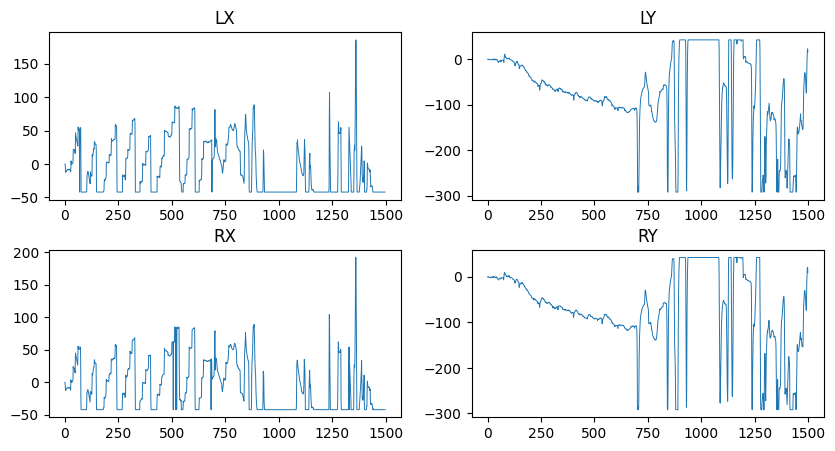

In [8]:
#print entire data of one candidate
#you can plot of any candidate using the following function:
plot_entire_candidate(1, 45, Full_data) #(0-Control 1-Dyslexic, number of the candidate)

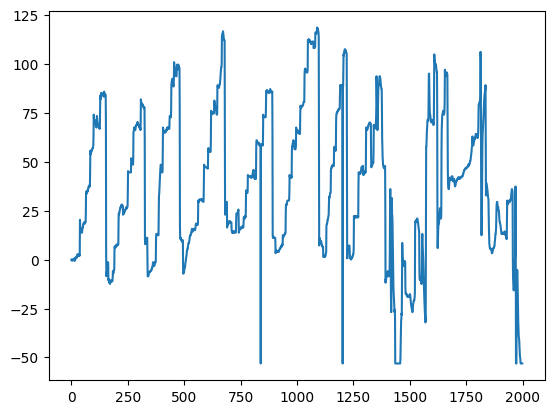

In [9]:
# looking at Data

# (0-Control 1-Dyslexic, number of the candidate)

#printing x-axis data for a few random candidates:
plt.plot(C_data[4]['RX'])

In [10]:
# There are many dips that are observed here - They indicate the ends of lines 

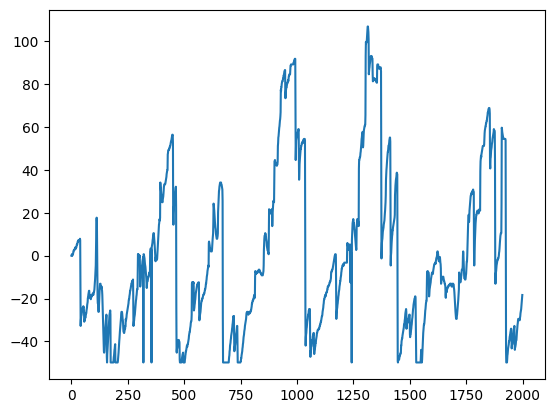

In [11]:
# Plotting a few more points
plt.plot(C_data[60]['RX'])

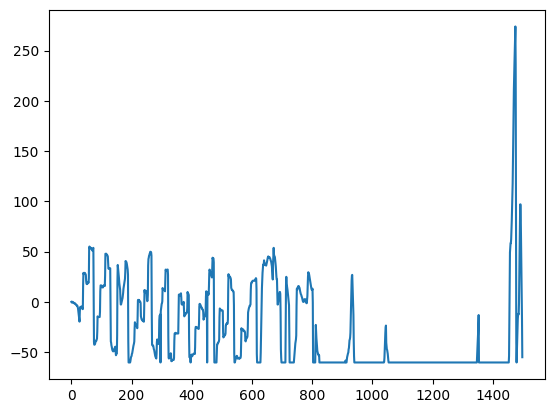

In [12]:
plt.plot(D_data[49]['RX'])

In [13]:
# Although Dips are apparent, it was difficult to seperate the lines, especially the 4th and 5th lines. All the candidates were asked to test the same number of lines

However there were some inconsistencies between the left and the right eye

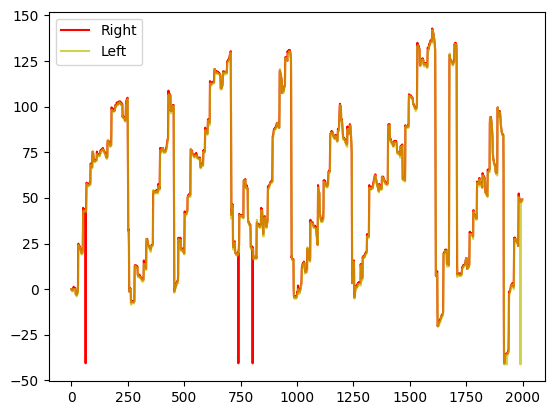

In [14]:
#ploting few left and right eye readings:
plot_left_right(0, 89, Full_data, 'X')

# Data_Load

In [40]:
#Get Control and Dyslexic data as required for the STFT operations 
def get_stft_data(C_data, D_data): 
    C_new = []
    for data in C_data:
        X =data[['LX','RX']]
        Y =data[['LY','RY']]
        Xm = X.mean(axis=1)
        Ym = Y.mean(axis=1)
        f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
        f = f.transpose()
        f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
        C_new.append(f)

    D_new = []
    for data in D_data:
        X =data[['LX','RX']]
        Y =data[['LY','RY']]
        Xm = X.mean(axis=1)
        Ym = Y.mean(axis=1)
        f = pd.DataFrame([data.iloc[:,0],Xm,Ym])
        f = f.transpose()
        f = f.rename(columns = {'Unnamed 0': 'X', 'Unnamed 1': 'Y'})
        D_new.append(f)
    
    C_new,D_new = normalise_data(C_new,D_new)
    
    C_cmx = []
    C_real= []
    C_img=[]
    for j in range(len(C_new)):
        dat = C_new[j]
        x = dat['X']
        y = dat['Y']
        t = dat['T']

        z=[]
        x_in=[]
        y_in=[]
        for i in range(0,x.size):
            z.append(complex(x[i],y[i]))
            x_in.append(x[i])
            y_in.append(y[i])


        C_cmx.append(z)
        C_real.append(x_in)
        C_img.append(y_in)

    D_cmx = []
    D_real= []
    D_img=[]
    for j in range(len(D_new)):
        dat = D_new[j]
        x = dat['X']
        y = dat['Y']
        t = dat['T']

        z=[]
        x_in=[]
        y_in=[]
        for i in range(0,x.size):
            z.append(complex(x[i],y[i]))
            x_in.append(x[i])
            y_in.append(y[i])
        D_cmx.append(z)
        D_real.append(x_in)
        D_img.append(y_in)
    
    return C_cmx, C_real, C_img, D_cmx, D_real, D_img, C_new, D_new

In [41]:
# Function to normalise data

def normalise_data(C_new,D_new): 
    for i in range(len(C_new)):
        C_tempx = np.abs(C_new[i]['X'])
        mx = max(C_tempx)
        C_tempy = np.abs(C_new[i]['Y'])
        my= max(C_tempy)
        C_new[i]['X'] = C_new[i]['X']/np.abs(mx)
        C_new[i]['Y'] = C_new[i]['Y']/np.abs(my)
    for i in range(len(D_new)):
        D_tempx = np.abs(D_new[i]['X'])
        mx = max(D_tempx)
        D_tempy = np.abs(D_new[i]['Y'])
        my= max(D_tempy)
        D_new[i]['X'] = D_new[i]['X']/np.abs(mx)
        D_new[i]['Y'] = D_new[i]['Y']/np.abs(my)  
    return C_new,D_new

In [42]:
# Function to find the average of the Left & Right Eyes. This is used in the cases of intersection b/w the data points for the Left and Right Eye.

def average_l_r(data):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Calculates the average values of the left and righty eye readings.
# INPUT:
#     data   : dataframe of a single candidate 

#x   : the average of the x coordinates of the left and right eye readings
#y   : the average of the y coordinates of the left and right eye readings

#OUTPUT:
#     x_y_data: combines the average of the x and y coordinates into a dictionary of form: 
#     X: x,
#     Y: y
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    x = [sum(x)/2 for x in zip(data['LX'].to_list(), data['RX'].tolist())]
    y = [sum(x)/2 for x in zip(data['LY'].to_list(), data['RY'].tolist())]
    x_y_data = {'X':x, 'Y':y}
    
    return x_y_data 


In [43]:
def data_lens():
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Returns a representation of lengths of the entries in C_data and D_data combined. 
#OUTPUT: 
#     lens: contains the representation of lengths of each entry in C_data and D_data in this order.
#           value : length represented
#             0   :        999
#             1   :        1249
#             2   :        1499
#             3   :        1749
#             5   :        1999
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    C_data, D_data = get_data()
    lens = []
    for dSet in [C_data, D_data]:
        for data in dSet:
            lens.append(int(((len(data['LX']) + 1)/250) - 4))
    return lens

In [44]:
# Now to fix the issue of averaging,

In [45]:
x_y_data = average_l_r(D_data[80])

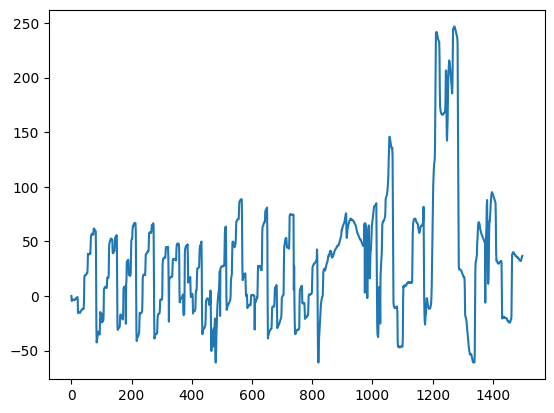

In [46]:
plt.plot(x_y_data['X'])

# Data Manipulation:

In [47]:
# To define the original dataset

def original_vector(data_set):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#appends the 'X' and 'Y' values of the dataset one after the other 

#  x = xxxxxxxxxxxxxxxxxxxxxxxxx, y = yyyyyyyyyyyyyyyyyyyyyyyyy
#          avg of x values             avg of x values
#  data = xxxxxxxxxxxxxxxxxxxxxxxxxyyyyyyyyyyyyyyyyyyyyyyyyy
#        |________________________||________________________|       
#                    x                        y

#OUTPUT:
#     data : Appended avg of x and y values
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    data = []
    feature_list = ['X', 'Y']
    data_conv = average_l_r(data_set)
    for f in feature_list:
        data += data_conv[f]

    return data


In [48]:
def get_padded(a,ml):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Adds 0 padding at the end to make vector length equal to 'ml'
#INPUT:
#     a = vector to be padded
#     ml = target length after padding

#   a     =   ////////////////////////

#padded a =   ////////////////////////0000000
#             |<-------------ml------------->|
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    a = np.pad(a, (0,abs(ml - len(a))), 'mean')
    
    return a 


In [49]:
def padding_at_last(data_set):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Combines the data vectors (X, Y) one after the other into a single vector. Added 0s towards the end to match the length of the longest vector if just x and y values are combined without any padding. 
#In our dataset the longest vector is of length 3998.

#  x = xxxxxxxxxxxxxxxxxxxxxxxxx, y = yyyyyyyyyyyyyyyyyyyyyyyyy
#          avg of x values             avg of x values

##  data = xxxxxxxxxxxxxxxxxxxxxxxxxyyyyyyyyyyyyyyyyyyyyyyyyy0000000000000000
#          |_______________________||_______________________||______________|       
#                     x                        y                    0s
#          |<-------------------length of longest vector------------------->|

#OUTPUT:
#     data: x, y combined and padded with 0s
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    data = []
    feature_list = ['X', 'Y']
    data_conv = average_l_r(data_set)
    for f in feature_list:
        data += data_conv[f]
    
    return get_padded(data,3998)


In [50]:
def padding_in_bw(data_set):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Pads each feature (X and Y) separately to match the longest length of a single fearture vector. In our case it's 1999. Then appends them together.

#  x = xxxxxxxxxxxxxxxxxxxxxxxxx, y = yyyyyyyyyyyyyyyyyyyyyyyyy
#          avg of x values             avg of x values

# padded x =  xxxxxxxxxxxxxxxxxxxxxxxxx00000000
#             |_______________________||______|
#                         x               0s          

# padded y =  yyyyyyyyyyyyyyyyyyyyyyyyy00000000
#             |_______________________||______|
#                         y               0s    

#             |<----------------------------->|
#          length of longest single fearture vector

# data =  xxxxxxxxxxxxxxxxxxxxxxxxx00000000yyyyyyyyyyyyyyyyyyyyyyyyy00000000
#         |_______________________||______||_______________________||______|
#                     x               0s               y               0s     

#OUTPUT:
#     data: combined padded x and padded y
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    data = []
    feature_list = ['X', 'Y']
    data_conv = average_l_r(data_set)
    for f in feature_list:
        data += get_padded(data_conv[f],1999).tolist()
        
    return data

In [51]:
def positions(secf, dif, fact):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Gives indexes of equally spaced positions in a vector to add or remove values to match a certain length. In our case it's 1999.
#INPUT: 
#     secf:  Length of each equal space
#     dif:  Number of positions to be added/removed
#     fact:  

#OUTPUT:
#     arr: vector containing 'dif' number of equally spaced positions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    arr = []
    cn = 0
    for a in range(dif-1):
        cn = cn+secf + 1 if (a+1)%fact == 0 else cn+secf 
        arr.append(cn)
    
    return arr

In [52]:
def interpolating(data_set):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Adds data points at regular intervals by taking the average of the adjacent values to match the longest length of a single fearture vector. In our case it's 1999.

#  x = xxxxxxxxxxxxxxxxxxxxxxxxx, y = yyyyyyyyyyyyyyyyyyyyyyyyy
#          avg of x values             avg of x values

# interpolated x =  xxxxxXxxxxxXxxxxxXxxxxxXxxxxx
#                  |_____^_____^_____^_____^___|
#           x with values inserted at regualar intervals                 

# interpolated y =  yyyyyYyyyyyYyyyyyYyyyyyYyyyyy
#                  |_____^_____^_____^_____^___|
#           y with values inserted at regualar intervals    

#             |<----------------------------->|
#          length of longest single fearture vector

# combined_data =   xxxxxXxxxxxXxxxxxXxxxxxXxxxxxyyyyyYyyyyyYyyyyyYyyyyyYyyyyy
#                  |____________________________||___________________________|
#                          interpolated x               interpolated y     

#OUTPUT:
#     combined_data: Appended interpolated x and inpterpolated y together
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    feature_list = ['X', 'Y']
    data_conv = average_l_r(data_set)
    
    combined_data = []
    ln = len(data_conv['X'])
    dif = 2000-ln
    sec = math.floor(ln/dif)

    pos_arr = positions(sec, dif, 1 if ln == 1499 else 2)

    for f in feature_list:
        data = []         
        curr = 0 
        for pos in range(1999):
            if curr < ln:
                if pos in pos_arr:
                    data.append((data_conv[f][curr]+data_conv[f][curr+1])/2)                        
                    data.append(data_conv[f][curr])
                    curr += 1
                else:
                    data.append(data_conv[f][curr])
                    curr += 1
        while len(data)<1999:
            last_val = data[-1]
            data.append(last_val)
            
        combined_data += data
    return combined_data

In [53]:
def exterpolation(data_set):  
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Removes data points at regular intervals to match the shortest length of a single fearture vector. In our case it's 999.

#  x = xxxxxxxxxxxxxxxxxxxxxxxxx, y = yyyyyyyyyyyyyyyyyyyyyyyyy
#          avg of x values             avg of x values

#                       x   x   x   x
# exterpolated x =  xxxxxxxxxxxxxxxxxxxx
#                  |___^___^___^___^___|
#           x with values removed at regualar intervals                 

#                       y   y   y   y
# exterpolated y =  yyyyyyyyyyyyyyyyyyyy
#                  |___^___^___^___^___|
#           y with values removed at regualar intervals    

#                  |<----------------->|
#          length of shortest single fearture vector

# combined_data =   xxxxxxxxxxxxxxxxxxxxyyyyyyyyyyyyyyyyyyyy
#                  |___________________||__________________|
#                      exterpolated x      exterpolated y     

#OUTPUT:
#     combined_data: Appended exterpolated x and exterpolated y together
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    feature_list = ['X', 'Y']
    data_conv = average_l_r(data_set)
    
    combined_data = []
    ln = len(data_conv['X'])
    dif = ln-998
    sec = math.floor(ln/dif)

    pos_arr = positions(sec, dif, 4 if ln == 1749 else 2)


    for f in feature_list:
        data = []  
        for pos in range(ln):
            y = 0
            if pos not in pos_arr:
                data.append(data_conv[f][pos])

        combined_data += data
        
    return combined_data

In [54]:
full_data = original_vector(C_data[2])

In [55]:
len(C_data[2]['LX'])

1999

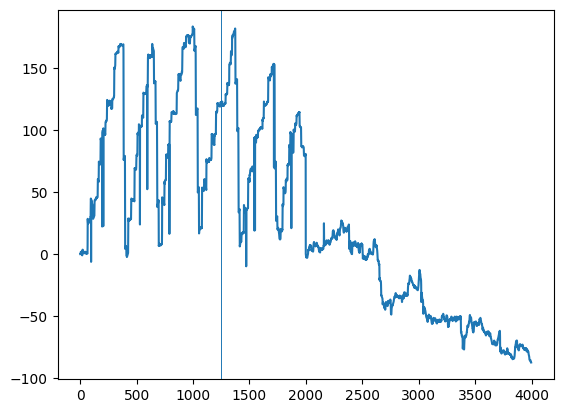

In [56]:
plt.plot(full_data)
plt.axvline(1249, linewidth = 0.7)

In [57]:
# Now we shall split the data into different length vectors. We will use k-means classification on the new data and compare the confusion matrix of different groups
# We compare the performance on different sub-groups


def conf_mat(act_lab, pred_lab):
    conf_len = [[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]]]
    
    data_lens1 = data_lens()
    for a in range(len(act_lab)):
        conf_len[data_lens1[a]][int(act_lab[a])][int(pred_lab[a])] += 1
    
    return np.array(conf_len)
    

# We shall now try different methods to equalize length of the vectors

# 1. Padding at the end: 

In [58]:
padding = padding_at_last(C_data[2])  # From Data Manipulations

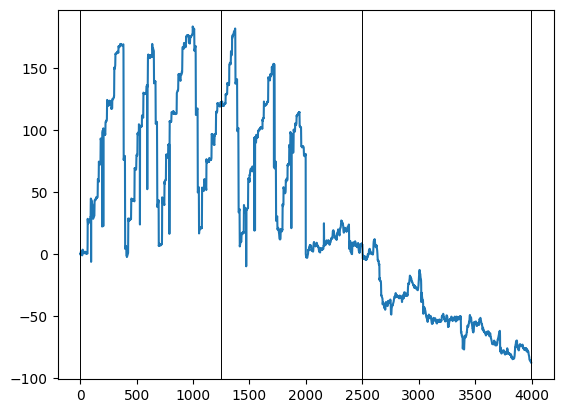

In [59]:
plt.plot(padding)
plt.axvline(1249, linewidth = 0.7, c = 'k')
plt.axvline(1249*2, linewidth = 0.7, c = 'k')
plt.axvline(0, linewidth = 0.7, c = 'k')
plt.axvline(len(padding), linewidth = 0.7, c = 'k')

In [60]:
# Applying K-means after performing padding to see performance

In [61]:
all_candidates = []
for categ in [D_data, C_data]:
    for data_set in categ:
        all_candidates.append(padding_at_last(data_set))

In [69]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(all_candidates)

predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.ones(98), np.zeros(88)))

c:\users\sumantha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [70]:
acc = accuracy_score(actual_labels,predicted_labels)*100
acc

51.075268817204304

In [71]:
#confusion matrix of sets of different lengths of candidates
conf_mat(actual_labels, predicted_labels)

array([[[ 3,  8],
        [ 0,  0]],

       [[ 2,  8],
        [ 0,  0]],

       [[23, 31],
        [ 0,  2]],

       [[ 0,  1],
        [ 0,  0]],

       [[ 5,  7],
        [36, 60]]])

# 2. Padding in between

In [72]:
padding = padding_in_bw(C_data[2])

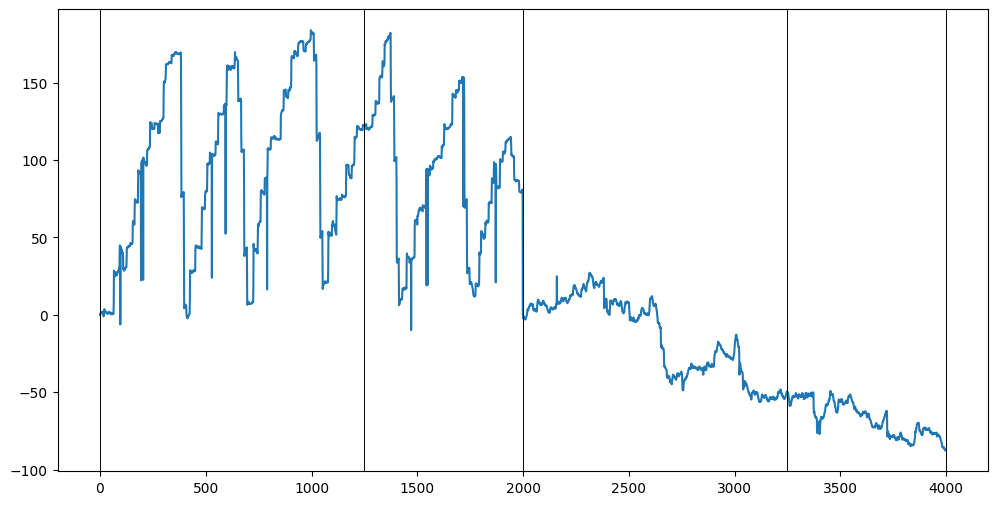

In [73]:
plt1 = plt.figure(figsize=(12,6))
plt.plot(padding)
plt.axvline(1249, linewidth = 0.7, c = 'k')
plt.axvline(len(padding)/2, linewidth = 0.7, c = 'k')
plt.axvline(1249 + len(padding)/2, linewidth = 0.7, c = 'k')
plt.axvline(len(padding), linewidth = 0.7, c = 'k')
plt.axvline(0, linewidth = 0.7, c = 'k')

In [74]:
all_candidates = []
for categ in [D_data, C_data]:
    for data_set in categ:
        all_candidates.append(padding_in_bw(data_set))

In [76]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(all_candidates)

predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.ones(98), np.zeros(88)))

c:\users\sumantha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
acc = accuracy_score(actual_labels,predicted_labels)*100
acc

51.075268817204304

In [78]:
conf_mat(actual_labels, predicted_labels)

array([[[ 3,  8],
        [ 0,  0]],

       [[ 2,  8],
        [ 0,  0]],

       [[23, 31],
        [ 0,  2]],

       [[ 0,  1],
        [ 0,  0]],

       [[ 5,  7],
        [36, 60]]])

# 3. Interpolation

In [79]:
padding = interpolating(C_data[2])

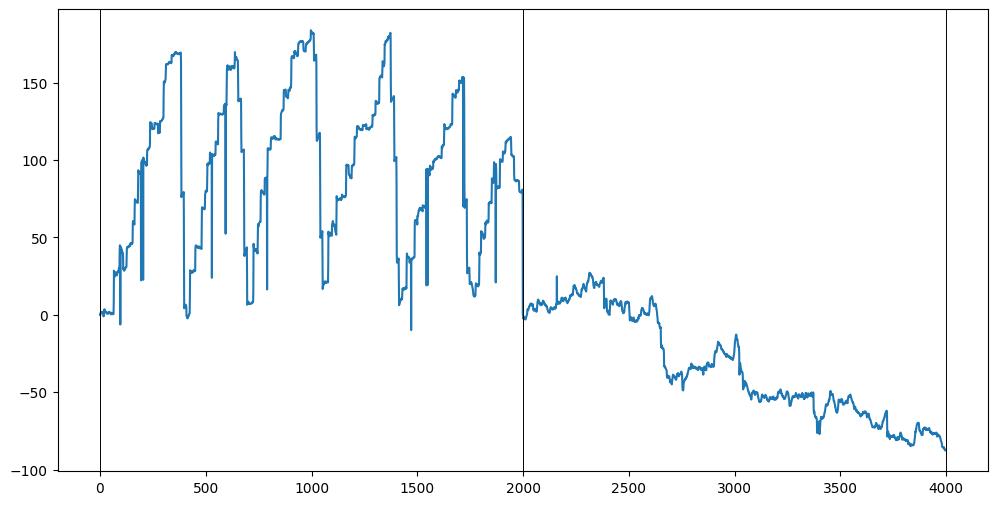

In [80]:
plt1 = plt.figure(figsize=(12,6))
plt.plot(padding)
plt.axvline(1999, linewidth = 0.7, c = 'k')
plt.axvline(1999*2, linewidth = 0.7, c = 'k')
plt.axvline(0, linewidth = 0.7, c = 'k')

In [81]:
all_candidates = []
for categ in [D_data, C_data]:
    for data_set in categ:
        all_candidates.append(interpolating(data_set))

In [82]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(all_candidates)

predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.ones(98), np.zeros(88)))

c:\users\sumantha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
acc = accuracy_score(actual_labels,predicted_labels)*100
acc

50.53763440860215

In [84]:
conf_mat(actual_labels, predicted_labels)

array([[[ 2,  9],
        [ 0,  0]],

       [[ 2,  8],
        [ 0,  0]],

       [[23, 31],
        [ 0,  2]],

       [[ 0,  1],
        [ 0,  0]],

       [[ 5,  7],
        [36, 60]]])

# 4.Exterpolation

In [85]:
padding = exterpolation(C_data[2])

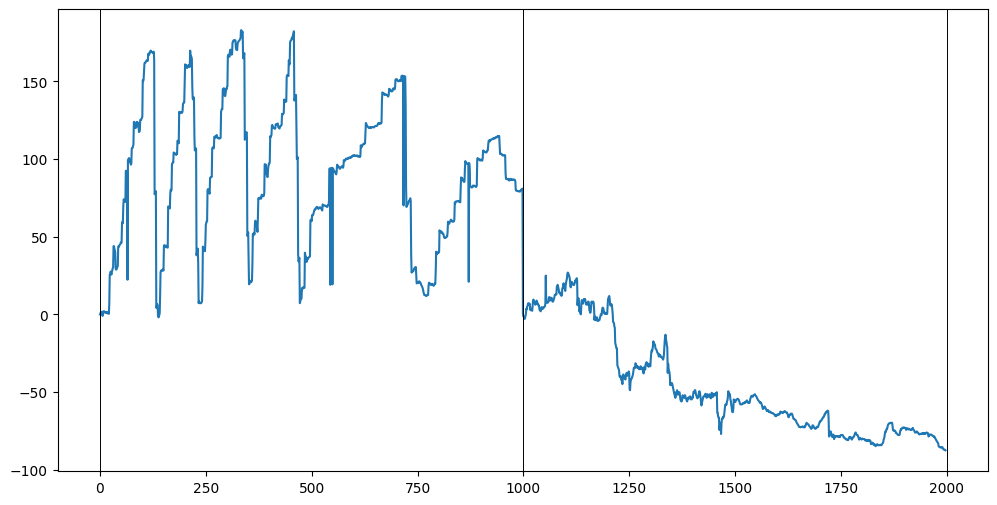

In [86]:
plt1 = plt.figure(figsize=(12,6))
plt.plot(padding)
plt.axvline(2000, linewidth = 0.7, c = 'k')
plt.axvline(1000, linewidth = 0.7, c = 'k')
plt.axvline(0, linewidth = 0.7, c = 'k')

In [87]:
all_candidates = []
for categ in [D_data, C_data]:
    for data_set in categ:
        all_candidates.append(exterpolation(data_set))

In [89]:
kmeans = KMeans(n_clusters = 2, random_state=0).fit(all_candidates)

predicted_labels = kmeans.labels_
actual_labels = np.concatenate((np.ones(98), np.zeros(88)))

c:\users\sumantha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
acc = accuracy_score(actual_labels,predicted_labels)*100
100  - acc

47.31182795698925

In [91]:
conf_mat(actual_labels, predicted_labels)

array([[[ 4,  7],
        [ 0,  0]],

       [[ 2,  8],
        [ 0,  0]],

       [[22, 32],
        [ 1,  1]],

       [[ 1,  0],
        [ 0,  0]],

       [[ 5,  7],
        [33, 63]]])

# 5. Black & White Distance Visualizations

In [92]:
#selecting candidates:
set1 = [D_data[6], D_data[3], D_data[23], D_data[43], D_data[64]]
set2 = [C_data[63], C_data[23], C_data[43], C_data[3], C_data[14]]

#using padding at the end to equalize lengths (any method can be used):
new_set1 = np.array([])
new_set2 = np.array([])

for i in set1:
    new_set1 = np.append(new_set1,padding_in_bw(i))
    
for i in set2:
    new_set2 = np.append(new_set2,padding_in_bw(i))   

In [95]:
new_set1

array([  0.        ,  -0.32768   ,  -0.655355  , ..., -27.59881618,
       -27.59881618, -27.59881618])

In [97]:
return_sq_im(new_set1, new_set2)

KeyboardInterrupt: 

# Binning

# Time Domain --->  Frequency Domain

In [102]:
def binning(bins, fft, overlap_per):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# maps a vector any lenght to a vector of a fixed length(bins) as needed. 

#INPUT: 
#     bins: Number of elements in the target vector
#     fft: Set of all FFTs
#     overlap_per: Percentage of overlap between successive entries

#Each entry of the resulting vector is a sum of fixed number of elements of the input vector. Few of these elements are considered common for successive entries into the resulting vector. This is the overlapping factor.

# So the fixed number of elements considered for the each entry = (lenght of input vector/lenght of output vector) + overlap

#OUTPUT: 
#     binned: list of all ffts after binning
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    div_size = len(fft)/bins
    bin_size = div_size*(1+(overlap_per/100))
    half_bin = bin_size/2
    
    binned = []
    
    current_step = bin_size
    for a in range(bins):
        
        pos = np.ceil(half_bin + a*(div_size))
        start = 0 if a == 0 else int(np.ceil(pos - half_bin))
        end = -1 if a == (bins-1) else int(np.ceil(pos + half_bin))
        #print([start, end])
        
        binned = np.append(binned, sum(np.abs(fft[start : end]))) 
        
    return binned


In [109]:
def kmeans_binning(D_data,C_data, bins, overlap_per):
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# does the binning process and then applies kmeans to the binnned vectors. 
#INPUT: 
#     D_data: The data of all Dyslexic candidates
#     C_data: The data of all Control candidates
#     fft: Set of all FFTs
#     overlap_per: Percentage of overlap between successive entries

# OUTPUT:
#     1. conf_len: divides the entire data into groups of different lenghted vectors. Gives the confusion matrix based on the predictions for each separate group
#     2. conf_m: gives confusion matrix based on prediction for the entire dataset 
#     3. acc: gives accuracy of predictions
#     4. buckets: gives the binned data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    
    data_sets = [D_data,C_data]
    all_buckets = []
    conf_len = [[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]],[[0,0],[0,0]]]
    
    for dataset in data_sets:
        for no in range(1,len(dataset)):
            d = average_l_r(dataset[no])
            # Convert the dictionary dataset into a 2D array
            X = np.array([[d['X'], d['Y']]], dtype=object)
            Y = np.array([])
            Y = np.append(Y,X)
            Y_fft = fft(Y)   

            binned = binning(bins, Y_fft, overlap_per)
            all_buckets.append(binned)
    buckets = np.asarray(all_buckets)
            
    kmeans = KMeans(n_clusters = 2, random_state=0).fit(buckets)

    predicted_labels = kmeans.labels_
    actual_labels = np.concatenate((np.ones(96), np.zeros(88)))
    
    #for a in range(len(buckets)):
     #   conf_len[data_lens[a]][int(actual_labels[a])][int(predicted_labels[a])] += 1
    
    conf_m = confusion_matrix(actual_labels,predicted_labels)[:2]
    acc = accuracy_score(actual_labels,predicted_labels)*100
    
    return conf_m, acc, buckets

In [110]:
# Importing Data

feature_list=['LX', 'LY', 'RX', 'RY']
C_data, D_data = get_data()

In [111]:
conf, a, binned = kmeans_binning(D_data,C_data, 1000, 10)

c:\users\sumantha\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [112]:
# Confusion Matrix
conf

array([[46, 42],
       [23, 73]], dtype=int64)

In [113]:
# Accuracy
a

64.67391304347827

In [114]:
# Binned Data
binned

array([[412885.92335254, 149762.64752961, 156717.41738787, ...,
        153402.48916957, 148661.06763824, 102619.58827403],
       [ 87476.65497714,  34984.86984925,  28909.81312958, ...,
         29311.82851143,  61642.95359909,  36042.47476116],
       [177242.26184683, 117251.8569835 , 139204.18139031, ...,
        113308.43782348,  98200.01701599,  41227.59559398],
       ...,
       [226317.4567129 , 102259.49596227,  67385.78526278, ...,
         81588.12957067, 109303.43501909,  58045.42968783],
       [449928.56926341, 117056.9297654 ,  74439.92300533, ...,
         75041.05050887, 236601.69292954, 170928.65881576],
       [449928.56926341, 117056.9297654 ,  74439.92300533, ...,
         75041.05050887, 236601.69292954, 170928.65881576]])

# GNN Model Building

In [1]:
# Importing libraries for Data Gathering & Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure
from scipy.spatial.distance import euclidean as eu
import math
from scipy import signal
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing

import glob



import os
# Importing Libraries for Binning
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import preprocessing
from scipy.fftpack import fft, ifft




# Importing the necessary libraries for building neural network and k-means clustering
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [61]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from sklearn.metrics import accuracy_score


In [62]:
dyslexia_folder = "Data/Dyslexic"
control_folder = "Data/Control"

# Function to load data from folder
def load_data_from_folder(folder, label):
    data_list = []
    for filename in os.listdir(folder):
        if filename.endswith(".csv"):
            data = pd.read_csv(os.path.join(folder, filename))
            # Create a unique identifier for each patient based on CSV file name
            data["patient_id"] = filename.split(".")[0]  # Extract patient ID from filename
            data["label"] = label  # Add label column
            data_list.append(data)
    return data_list

# Load dyslexia (D) and control (C) samples
D_data = load_data_from_folder(dyslexia_folder, "dyslexia")
C_data = load_data_from_folder(control_folder, "control")

In [63]:
# Taking the data that has been pre-processed and using it for the model

In [64]:
len(C_data)

88

In [65]:
len(D_data)

98

In [6]:
# Assuming C_data contains data for control candidates and D_data contains data for dyslexic candidates

# Create labeled datasets
#C_data = []
#D_data=[]

# Assign labels for control candidates (label 0)
#for data in CL_data:
    # Process each data entry and append with label
    #C_data.append((data, 0))  # Append (data, label) tuple where label is 0 for Control

# Assign labels for dyslexic candidates (label 1)
#for data in DL_data:
    # Process each data entry and append with label
    #D_data.append((data, 1))  # Append (data, label) tuple where label is 1 for Dyslexic


In [7]:
import networkx as nx


In [17]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def create_graph_from_data(data_tuple):
    data, _ = data_tuple  # Extract the DataFrame (data) from the tuple
    G = nx.Graph()
    
    # Add nodes (gaze coordinates) to the graph
    for index, row in data.iterrows():
        node_attrs = {'LX': row['LX'], 'LY': row['LY'], 'RX': row['RX'], 'RY': row['RY']}
        G.add_node(index, **node_attrs)
    
    # Add edges based on proximity or temporal relationships
    for i in range(len(data) - 1):
        # Calculate Euclidean distance between consecutive gaze points
        coords_i = data.loc[i, ['LX', 'LY', 'RX', 'RY']].values
        coords_next = data.loc[i+1, ['LX', 'LY', 'RX', 'RY']].values
        distance = np.linalg.norm(coords_i - coords_next)
        
        # Add an edge if the distance is below a threshold (adjust threshold as needed)
        if distance < 5:  # Example threshold: connect nodes within 5 pixels distance
            G.add_edge(i, i+1)
    
    # Print graph information for debugging
    print("Number of nodes:", G.number_of_nodes())
    print("Number of edges:", G.number_of_edges())
    
    return G

# Convert C_data and D_data to tuples with a placeholder value
C_data_tuples = [(df, None) for df in C_data]
D_data_tuples = [(df, None) for df in D_data]

# Create graphs for control (C) and dyslexia (D) datasets
C_graphs = [create_graph_from_data(data_tuple) for data_tuple in C_data_tuples]
D_graphs = [create_graph_from_data(data_tuple) for data_tuple in D_data_tuples]

# Plotting the graphs



Number of nodes: 1499
Number of edges: 1000
Number of nodes: 1999
Number of edges: 1564
Number of nodes: 1249
Number of edges: 950
Number of nodes: 1999
Number of edges: 1477
Number of nodes: 1249
Number of edges: 977
Number of nodes: 1249
Number of edges: 756
Number of nodes: 1499
Number of edges: 1109
Number of nodes: 1499
Number of edges: 1161
Number of nodes: 1249
Number of edges: 1000
Number of nodes: 1499
Number of edges: 1142
Number of nodes: 1499
Number of edges: 1105
Number of nodes: 1499
Number of edges: 1014
Number of nodes: 1749
Number of edges: 1414
Number of nodes: 1249
Number of edges: 947
Number of nodes: 1499
Number of edges: 1104
Number of nodes: 1499
Number of edges: 1223
Number of nodes: 1999
Number of edges: 1579
Number of nodes: 1499
Number of edges: 1169
Number of nodes: 1499
Number of edges: 1201
Number of nodes: 1499
Number of edges: 1086
Number of nodes: 1499
Number of edges: 1207
Number of nodes: 1499
Number of edges: 1204
Number of nodes: 1499
Number of edge

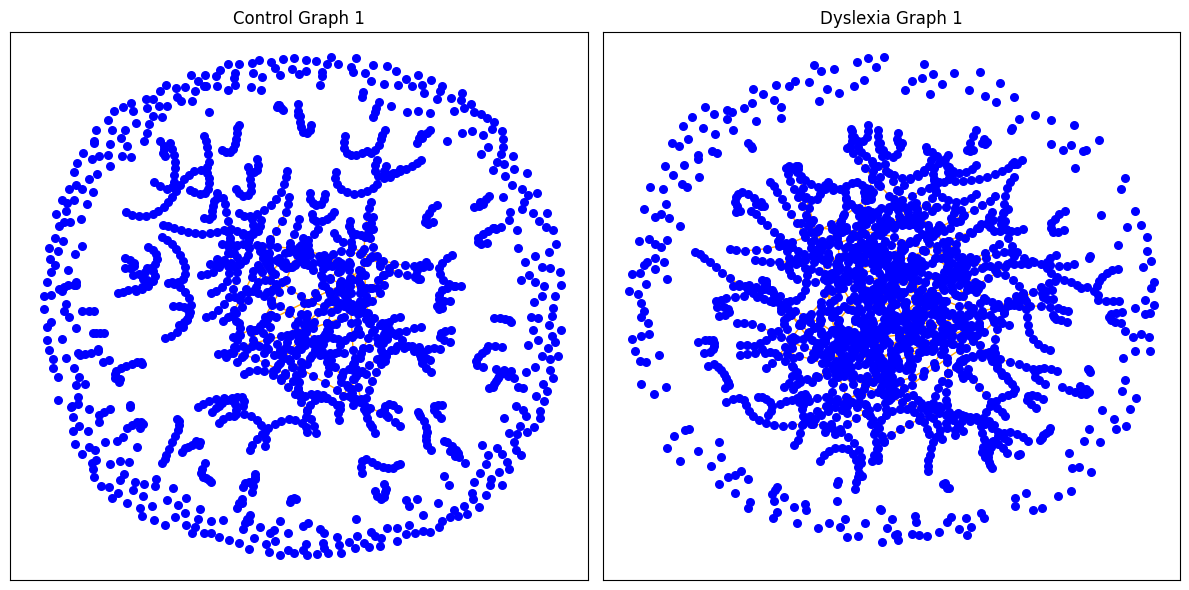

In [21]:
# Define node and edge colors
node_color = 'blue'
edge_color = 'orange'

# Set the size of the nodes (you can adjust this based on your preference)
node_size = 30

# Set the size of the figure (width, height) in inches
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot the first graph from the control (C) dataset
G_c = C_graphs[0]
plt.subplot(1, 2, 1)
pos_c = nx.spring_layout(G_c)
nx.draw_networkx_nodes(G_c, pos_c, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_c, pos_c, edge_color=edge_color)
plt.title("Control Graph 1")

# Plot the first graph from the dyslexia (D) dataset
G_d = D_graphs[0]
plt.subplot(1, 2, 2)
pos_d = nx.spring_layout(G_d)
nx.draw_networkx_nodes(G_d, pos_d, node_color=node_color, node_size=node_size)
nx.draw_networkx_edges(G_d, pos_d, edge_color=edge_color)
plt.title("Dyslexia Graph 1")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [22]:
#import matplotlib.pyplot as plt

# Visualize a sample graph from C_graphs
##sample_graph = C_graphs[0]  # Select the first graph from C_graphs
#plt.figure(figsize=(8, 6))
#nx.draw(sample_graph, with_labels=True, node_size=100, node_color='skyblue')
#plt.title("Sample Graph (Control Candidate)")
#plt.show()


In [18]:
sample_graph = C_graphs[0]  # Replace with any graph from C_graphs or D_graphs
for node in sample_graph.nodes():
    print(f"Node {node} attributes: {sample_graph.nodes[node]}")

Node 0 attributes: {'LX': 0.0, 'LY': 0.0, 'RX': 0.0, 'RY': 0.0}
Node 1 attributes: {'LX': 0.65535, 'LY': -9.9999999960687e-06, 'RX': 0.65535999999999, 'RY': -0.65536}
Node 2 attributes: {'LX': 0.65534, 'LY': -9.9999999960687e-06, 'RX': 0.65535999999999, 'RY': -0.65536}
Node 3 attributes: {'LX': 0.65534, 'LY': -9.9999999960687e-06, 'RX': 0.65535, 'RY': -0.65536}
Node 4 attributes: {'LX': 0.65534, 'LY': -9.9999999960687e-06, 'RX': 0.65534, 'RY': 0.0}
Node 5 attributes: {'LX': 0.65533, 'LY': -9.9999999960687e-06, 'RX': 0.65534, 'RY': -0.65536}
Node 6 attributes: {'LX': 1.31069, 'LY': -9.9999999960687e-06, 'RX': 0.65534, 'RY': -0.65536}
Node 7 attributes: {'LX': 1.31069, 'LY': -0.65537, 'RX': 1.31069, 'RY': -0.65536}
Node 8 attributes: {'LX': 1.31068, 'LY': -0.65537, 'RX': 1.31069, 'RY': -0.65536}
Node 9 attributes: {'LX': 0.65532, 'LY': -9.9999999960687e-06, 'RX': 1.31069, 'RY': 0.0}
Node 10 attributes: {'LX': 1.31068, 'LY': 0.65536, 'RX': 1.31068, 'RY': 9.9999999960687e-06}
Node 11 attri

In [23]:
for G in C_graphs + D_graphs:
    for node in G.nodes():
        if 'X' not in G.nodes[node]:
            G.nodes[node]['X'] = 0.0  # Assign default value for missing 'X' feature
        if 'Y' not in G.nodes[node]:
            G.nodes[node]['Y'] = 0.0  # Assign default value for missing 'Y' feature

In [78]:
def graphs_to_pyg_data(graphs):
    pyg_data_list = []
    for G in graphs:
        # Extract node features
        node_features = [list(G.nodes[node].values()) for node in G.nodes()]
        x = torch.tensor(node_features, dtype=torch.float)
        
        # Extract edge indices
        edge_index = torch.tensor(list(G.edges), dtype=torch.long).t().contiguous()
        
        # Determine label based on dataset (e.g., control vs dyslexia)
        if G in C_graphs:
            label = torch.tensor([0], dtype=torch.long)  # Control group
        elif G in D_graphs:
            label = torch.tensor([1], dtype=torch.long)  # Dyslexia group
        else:
            label = torch.tensor([0], dtype=torch.long)  # Default to control
        
        # Create PyTorch Geometric Data object with label
        data = Data(x=x, edge_index=edge_index, y=label)
        pyg_data_list.append(data)
    
    return pyg_data_list


# 1. Standard STFT run

In [224]:
def stft_run(n_ratio,o_ratio):

# Standard STFT Run: Returns Full Flattened Vector
# Input:
#     tmat: Input data control+dyslexic
#     n_ratio: Ratio to equalise Output length. n_ratio = Length (L)/Bin width (B)
#     o_ratio: Ratio of Bin_width to Overlap


# Zxx (Complex) Shape: t x f: Compute 2D STFT output array. 
#                             --> f: proportional to (Length of signal / Bin Width)
#                             --> t: depends on Bin Width an Overlap .... (Refer binning approach for exact calcualtion)
# C_spec (Real) Shape: t x f: Zxx converted to absolute values.


# OUTPUT:
#      vec (Real) Shape: (t*f)x1 : Flattened C_spec vector. 



    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

# 2. STFT Half Run

In [225]:
def stft_run_half(n_ratio,o_ratio,lim1,lim2):

# Calculates STFT of selected temporal bins. 
# ------------------------------------------
# |           ||||||||||||||||             |
# |           ||||||||||||||||             |
# |           ||||||||||||||||             |
# |           ||||||||||||||||             |
# |           ||||||||||||||||             |
# |           ||||||||||||||||             |
# ------------------------------------------
#           lim1            lim2

# Input:
#     tmat   : Input data control+dyslexic
#     n_ratio: Ratio to equalise Output length. n_ratio = Length (L)/Bin width (B)
#     o_ratio: Ratio of Bin_width to Overlap
#     lim1   : Lower limit of selected bins
#     lim2   : Upper limit of selected bins


# Zxx (Complex) Shape: t x f: Compute 2D STFT output array. 
#                             --> f: proportional to (Length of signal / Bin Width)
#                             --> t: depends on Bin Width an Overlap .... (Refer binning approach for exact calcualtion)
# C_spec (Real) Shape: t x f: Zxx converted to absolute values.


# OUTPUT:
#      vec (Real) : Flattened C_spec vector sliced by bins 




    lim1= int(lim1)
    lim2= int(lim2)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        half_im=[]
        for i in range(len(tot)):
            half_im.append(tot[i][lim1:lim2])
            
        
        C_spec.append(np.asarray(half_im))
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    #print(C_spec[i].shape)
    
    for i in range(len(C_spec)):
        vec[i]=vec[i].flatten()
    
    

    return vec

# 3. STFT Frequency

In [226]:
# Flattened Vector depending on frequency

def stft_run_freq(n_ratio,o_ratio,lim1,lim2):

# Calculates STFT of selected temporal bins. 
# ------------------------------------------
# |========================================| lim2
# |========================================|
# |========================================| lim1
# |                                        |
# |                                        |
# |                                        |
# ------------------------------------------


# Input:
#     tmat   : Input data control+dyslexic
#     n_ratio: Ratio to equalise Output length. n_ratio = Length (L)/Bin width (B)
#     o_ratio: Ratio of Bin_width to Overlap
#     lim1   : Lower limit of selected frequency range
#     lim2   : Upper limit of selected frequency range


# Zxx (Complex) Shape: t x f: Compute 2D STFT output array. 
#                             --> f: proportional to (Length of signal / Bin Width)
#                             --> t: depends on Bin Width an Overlap .... (Refer binning approach for exact calcualtion)
# C_spec (Real) Shape: t x f: Zxx converted to absolute values.


# OUTPUT:
#      vec (Real) : Flattened C_spec vector sliced by frequency 




    lim1= int(lim1)
    lim2= int(lim2)
    C_spec = []
    vec= []
    for j in range(len(tmat)):
        data = tmat[j]
        L= len(data)+1
        k = int((len(data) + 1)/250) # k varies from 4 to 8
        N=20
        B  = L/n_ratio
        E =B/o_ratio#round((N*B - L)/(N-1))
        nf = 2000/n_ratio
        f, t, Zxx = signal.stft(tmat[j],fs= L/250, nperseg=B,noverlap= E,nfft=nf)
        
        tot = np.abs(Zxx)**2
        
        
        C_spec.append(np.abs(Zxx)**2)
    
    vec = []
    for i in range(len(C_spec)):
        vec.append(C_spec[i])
    print(C_spec[i].shape)
    
    factor = len(C_spec[i][3])
    l1= factor*lim1
    l2 = factor*lim2
    print(l1,l2)
    lfvec =[]
    hfvec =[]
    fvec=[]
    for i in range(len(C_spec)):
        x=vec[i].flatten()
        #print(len(x))
        #lfvec.append(x[:lim])
        #hfvec.append(x[lim:])
        fvec.append(x[l1:l2])
    
    

    return fvec

# Preparing Data before passing onto STFT ()

In [227]:
tmat=[]
for i in range(87):
    tmat.append(C_cmx[i])
for i in range(98):
    tmat.append(D_cmx[i])

In [228]:
#Labelling signals of different lengths
ylen=[]
for s in tmat:
    if(len(s)>1750):
        ylen.append(4)
    elif(len(s)>1500):
        ylen.append(3)
    elif(len(s)>1250):
        ylen.append(2)
    elif(len(s)>1000):
        ylen.append(1)
    else:
        ylen.append(0)

# Split Train and Test data for analysis

In [229]:
#Training testing data based on fixed index defined signals
def create_train_test(X,index):
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    index_test =[]
    index_train=index
    for i in range(len(X)):
        if i in index_train:
            X_train.append(X[i])
            y_train.append(y[i])
        else:
            X_test.append(X[i])
            y_test.append(y[i])
            index_test.append(i)
    return X_train, X_test,y_train,y_test,index_train,index_test

In [230]:
def add_num(ind):
    r=random.randint(0,186)
    if r not in ind:
        ind.append(r)
    else:
        add_num(ind)

# Getting Misclassified Points

In [231]:
# Function to get misclassified points

# Get misclassified points form final result 
#INPUT:
#     Res: Distances from separating plane
#  
# OUTPUT:
#      WrongClass: Array of all wrongly classified points
#                 Every element is [index, Length of reading]


def get_misclassified(res):
    WrongClass=[]
    for i in range(88):
        if(res[i]<0):
            WrongClass.append([i,ylen[i]])
    for i in range(88,185):
        if(res[i]>0):
            WrongClass.append([i,ylen[i]])
    return WrongClass
    

In [232]:
def misc_pts(misc):
    dp=[]
    for i in misc:
        dp.append(i[0])
    print(dp)

# Output Function

In [233]:
def final(X_train,y_train,X,y):

# Function to plot final perceptron results.

# scatter plot of all reading with heights from x-axis as distances from the separating plane.
# INPUT:
#      X_train, y_train: Training set readings and labels
# OUTPUT:
#      ht : Distances form separating plane ( +ve: Control side | -ve: Dyslexic side)
#      Perceptron Neural Network score: clf.score()

    clf.fit(X_train, y_train)
    ht = clf.decision_function(X)
    x = range(len(y))
    fig, ax = plt.subplots()
    ax.scatter(x,ht,c = ylen)
    ax.axvline(x=88, color='b', linestyle='-')
    ax.axhline(y=0, color='r', linestyle='-')
    print(clf.score(X,y))
    return ht

# Perceptron Output

In [234]:
# Creating instance of Perceptron to be used for Neural Network
clf = Perceptron(tol=1e-3, random_state=0)
y= np.concatenate((np.ones(87), np.zeros(98)))

In [235]:
# K-Means Clustering

from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)

In [236]:
import random
index=[]
for i in range(130):
    add_num(index)

In [237]:
len(index)

130

In [ ]:
# Standard STFT Run
# Returns Full Flattened Vector C_spec

In [238]:
vec = stft_run(125,2)
X = np.asarray(vec)
# Train_Test_Split
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)

# Using K-Means Classifier
y_km = Kmean.fit_predict(X)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(16, 251)


In [239]:
# Accuracy Score for Standard STFT run with K-Means Classifier

accuracy_score(y, y_km)

0.5243243243243243

0.9945945945945946


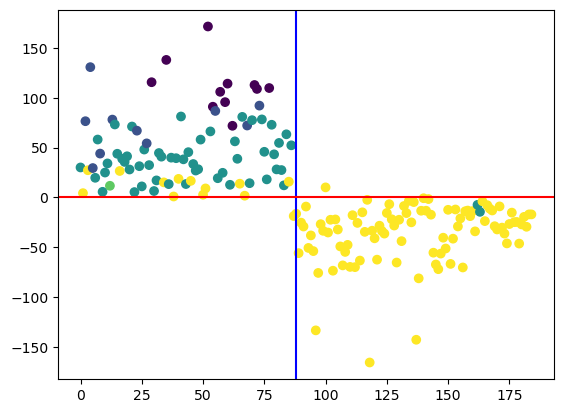

In [240]:
# Unsupervised learning method in which Perceptrons are used to build Neural Networks for prediction
# Distances from separating plane ( +ve: Control side | -ve: Dyslexic side)

res = final(X_train,y_train,X,y)

In [241]:
# Misclassified Points
misc1 = get_misclassified(res)

# Partial Bins

In [242]:
# Dataset is divided into groups/bins of 2

# First Half Bins        (0-124)

# K-Means Classifier
vec = stft_run_half(125,2,0,125)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.5081081081081081

0.9621621621621622


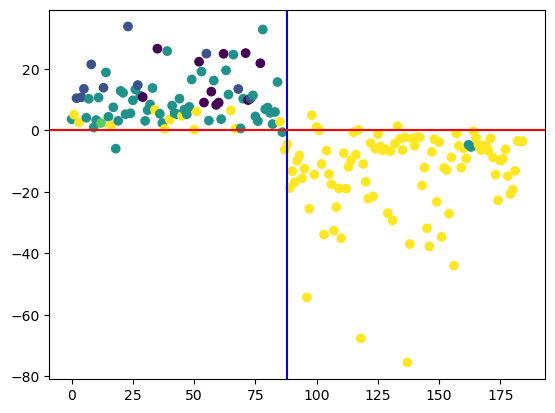

In [243]:
# Perceptron 
# Distances from separating plane ( +ve: Control side | -ve: Dyslexic side)

res = final(X_train,y_train,X,y)

In [244]:
misc2_half = get_misclassified(res)

In [245]:
#Second Half Bins    (125-250)

# K-Means Classifier
vec = stft_run_half(125,2,125,251)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4702702702702703

0.972972972972973


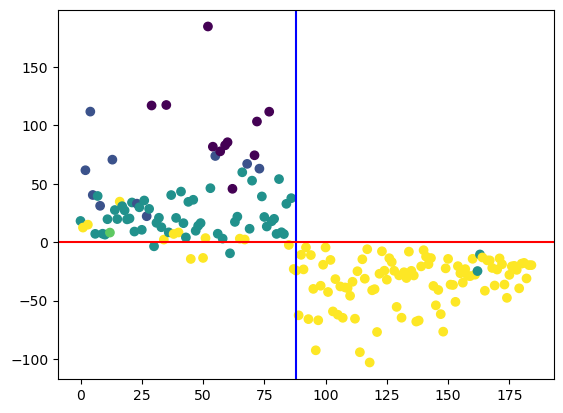

In [246]:
# Perceptron 
# Distances from separating plane ( +ve: Control side | -ve: Dyslexic side)

res = final(X_train,y_train,X,y)

In [247]:
misc2_half_r = get_misclassified(res)

# Quarter Bins

In [248]:
#First 25% (Q1) Bin     (0-62)

# K-Means Classifier
vec = stft_run_half(125,2,0,63)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
accuracy_score(y, y_km)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4972972972972973

0.918918918918919


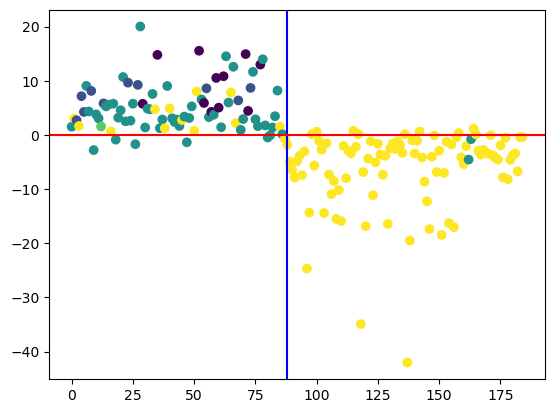

In [249]:
# Perceptron 
# Distances from separating plane ( +ve: Control side | -ve: Dyslexic side)

res = final(X_train,y_train,X,y)

In [250]:
misc2_q1 = get_misclassified(res)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.5567567567567567
0.9135135135135135


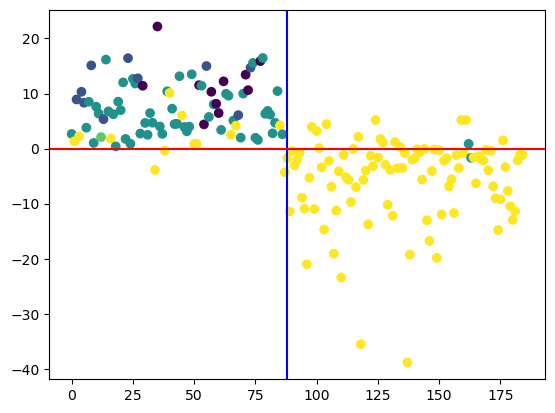

In [251]:
#Q2 Bin (25-50%)          (63-124)

vec = stft_run_half(125,2,63,125)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q2 = get_misclassified(res)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.5027027027027027
0.9675675675675676


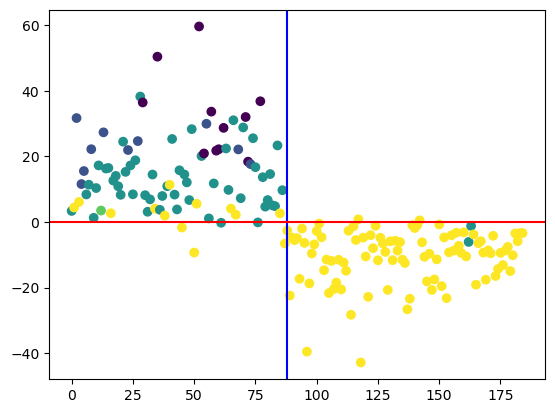

In [252]:
#Q3 Bin (50-75%)          (125-187)

vec = stft_run_half(125,2,125,188)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q3 = get_misclassified(res)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.4756756756756757
0.9405405405405406


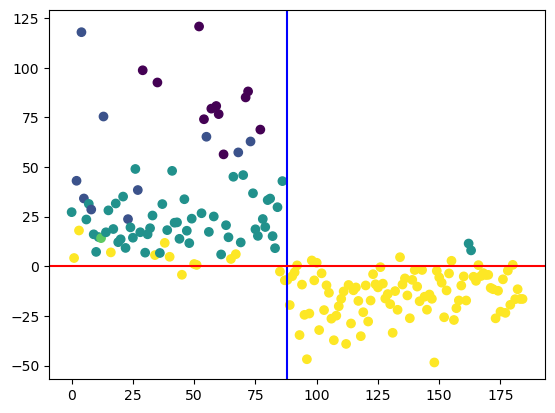

In [253]:
#Q4 Bin (75-100%)          (188-250)   

vec = stft_run_half(125,2,188,251)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
misc2_q4 = get_misclassified(res)

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0.4810810810810811
0.9621621621621622
[[9, 2], [87, 4], [117, 4], [125, 4], [142, 4], [150, 4], [171, 4], [176, 4]]


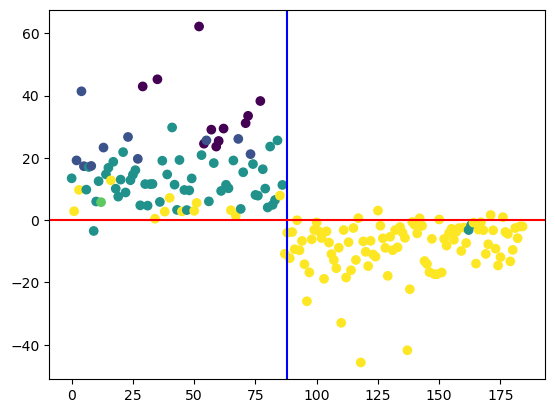

In [254]:
# Best Hyperparameters used on the model to get maximum score

# Standard STFT run
# Returns full flattened C_Spec vector
vec = stft_run(50,5)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
print(get_misclassified(res))

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


0.518918918918919
0.9621621621621622
[[9, 2], [87, 4], [117, 4], [125, 4], [142, 4], [150, 4], [171, 4], [176, 4]]


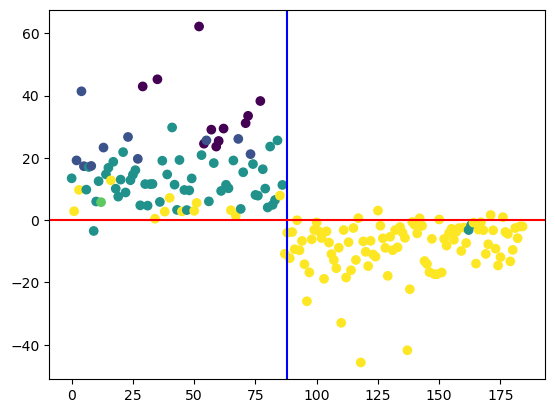

In [255]:
# Best Hyperparameters used on the model to get maximum score

# STFT run half
vec = stft_run_half(50,5,0,64)
X = np.asarray(vec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
print(get_misclassified(res))

C:\Users\aswin\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1852: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


(40, 64)
0 3200
0.4810810810810811
0.9621621621621622


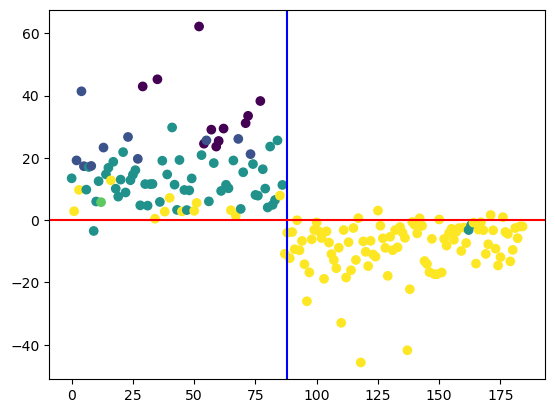

In [256]:
# Partial frequencies
# Binnning based on frequency

#Freq Div 35/40
fvec = stft_run_freq(50,5,0,50)
X = np.asarray(fvec)
X_train, X_test,y_train,y_test,index_train,index_test= create_train_test(X,index)
y_km = Kmean.fit_predict(X)
print(accuracy_score(y, y_km))
res = final(X_train,y_train,X,y)
temp = get_misclassified(res)

In [ ]:
# Feature extraction (example)
# Assuming you want to extract features from a specific batch of data
with torch.no_grad():
    model.eval()
    batch_data = next(iter(C_loader))  # Get a batch of data
    extracted_features = model(batch_data)
    # Extracted features can be further processed or used for downstream tasks
